In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import umap.umap_ as umap
import umap.plot
from sklearn.cluster import SpectralClustering

c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python3

In [3]:
df = pd.read_csv("data_compound.csv")
df

,sid,cid,smiles,bioactivity,type,value (nM)
0,316936203,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,316936247,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,316936221,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,316936228,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,316936201,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...,...
1629,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1630,336857410,9966680,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC3=CC=CC=C32,Unspecified,IC50,100000.0000
1631,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000
1632,336857473,4526747,C1CN(C(=S)N1)C(=S)NC(=O)C2=CC=CC=C2,Unspecified,IC50,100000.0000


In [4]:
df_hist = df[['cid','smiles','bioactivity', 'type', 'value (nM)']]
df_hist = df_hist[df_hist["bioactivity"] != 'Unspecified']
df_hist

,cid,smiles,bioactivity,type,value (nM)
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091
...,...,...,...,...,...
1352,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000
1353,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000
1354,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000
1355,118159128,CC(=O)N1CCC2=C(C1)N=C(C(=N2)N3CCC(CC3)OC4=C(C=...,Inactive,IC50,603900.0000


In [5]:
IC50_only = df_hist[df_hist['type']=='IC50'].reset_index(drop=True)
IC50_only['pIC50'] = 9 - np.log10(IC50_only['value (nM)'])
IC50_only = IC50_only.drop_duplicates(keep='first', ignore_index=True)
IC50_only

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,C[C@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CC...,Active,IC50,0.0066,11.180456
1,118159176,C[C@@H](C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3C...,Active,IC50,0.0083,11.080922
2,118159272,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)C(C...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)NC1=NC2=C(CN(CC2)C)N=C1N3CCC(CC3)C(=O)C4=...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCC2=C(C1)N=C(C(=N2)NCC(F)F)N3CCC(...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
579,118159281,CC(C)NC1=NC2=C(CCN(C2)C(=O)C3CC3)N=C1N4CCC(CC4...,Inactive,IC50,340200.0000,3.468266
580,118159155,CC(C)NC1=NC2=C(CN(CC2)C(=O)C)N=C1N3CCC(CC3)S(=...,Inactive,IC50,341500.0000,3.466609
581,118159118,CC(C)NC1=NC2=C(CCN(C2)C(=O)C)N=C1N3CCN(CC3)CC4...,Inactive,IC50,362900.0000,3.440213
582,118159228,CC(C)NC1=NC2=C(CCN(C2)C(=O)N3CCCC3)N=C1N4CCC(C...,Inactive,IC50,391000.0000,3.407823


<Figure size 2000x2000 with 0 Axes>

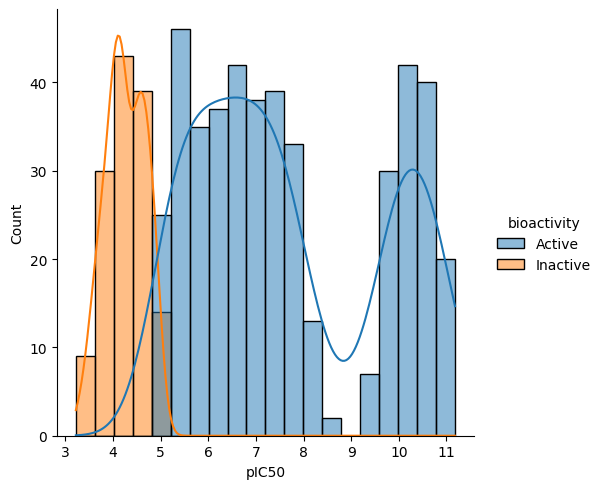

In [6]:
plt.figure(figsize=(20, 20))

sns.displot(IC50_only, bins=20, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [7]:
def canonical_smiles(smiles):
    mol_smiles = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol_smiles]

    return smiles

In [8]:
CANNO_SMILES = canonical_smiles(IC50_only.smiles)
len(CANNO_SMILES)

584

In [9]:
IC50_only['smiles'] = CANNO_SMILES
IC50_only

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,0.0066,11.180456
1,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,0.0083,11.080922
2,118159272,CC(=O)N1CCc2nc(NC(C)C)c(N3CCC(C(F)c4ccc(F)cc4F...,Active,IC50,0.0085,11.070581
3,118159276,CC(C)Nc1nc2c(nc1N1CCC(C(=O)c3cc(Cl)ccc3F)CC1)C...,Active,IC50,0.0088,11.055517
4,118159362,CN(C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc...,Active,IC50,0.0091,11.040959
...,...,...,...,...,...,...
579,118159281,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,340200.0000,3.468266
580,118159155,COc1cccc(S(=O)(=O)C2CCN(c3nc4c(nc3NC(C)C)CCN(C...,Inactive,IC50,341500.0000,3.466609
581,118159118,CC(=O)N1CCc2nc(N3CCN(Cc4ccc(C#N)cc4F)CC3)c(NC(...,Inactive,IC50,362900.0000,3.440213
582,118159228,CC(C)Nc1nc2c(nc1N1CCC(Oc3ccc(F)cc3F)CC1)CCN(C(...,Inactive,IC50,391000.0000,3.407823


In [51]:
compounds = []

for _, smiles, bioactivity, pIC50 in IC50_only[['smiles', 'bioactivity', 'pIC50']].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), bioactivity, pIC50))
compounds[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1d9ff956ce0>, 'Active', 11.18045606445813),
 (<rdkit.Chem.rdchem.Mol at 0x1d9ff955000>, 'Active', 11.080921907623926),
 (<rdkit.Chem.rdchem.Mol at 0x1d9ff956f10>, 'Active', 11.070581074285707),
 (<rdkit.Chem.rdchem.Mol at 0x1d9ff956ab0>, 'Active', 11.05551732784983),
 (<rdkit.Chem.rdchem.Mol at 0x1d9ff956dc0>, 'Active', 11.040958607678906)]

In [52]:
compounds_structure = pd.DataFrame(compounds, columns=["Structure", "bioactivity", "pIC50"])
compounds_structure.head(5)

,Structure,bioactivity,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x000001D9FF9...,Active,11.180456
1,<rdkit.Chem.rdchem.Mol object at 0x000001D9FF9...,Active,11.080922
2,<rdkit.Chem.rdchem.Mol object at 0x000001D9FF9...,Active,11.070581
3,<rdkit.Chem.rdchem.Mol object at 0x000001D9FF9...,Active,11.055517
4,<rdkit.Chem.rdchem.Mol object at 0x000001D9FF9...,Active,11.040959


In [53]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data]
    return Mfpts

mfpts = generate_mfpts(compounds_structure.Structure[:])
print("Number of compounds converted:", len(mfpts))
print("Fingerprint length per compound:", len(mfpts[0]))

Number of compounds converted: 584
Fingerprint length per compound: 2048


In [54]:
fp_name = [f'Bit_{i}' for i in range(2048)]
fp_bits = [list(l) for l in mfpts]

morganfp = pd.DataFrame(fp_bits, index=IC50_only["bioactivity"], columns=fp_name)
morganfp.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
morganfp.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
morganfp.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
morganfp_umap = morganfp.iloc[:, 1:]
morganfp_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [78]:
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=3)

In [79]:
data_umap = umapper.fit_transform(morganfp_umap)


In [90]:
data_umap_x = pd.DataFrame(data_umap[:, 0], columns = ['x'])
data_umap_y = pd.DataFrame(data_umap[:, 1], columns = ['y'])
cids = pd.DataFrame(morganfp["bioactivity"].values, columns = ['bioactivity'])
plot_umap = pd.concat([cids, data_umap_x, data_umap_y], axis = 1)
plot_umap

,bioactivity,x,y
0,Active,11.885149,-0.036596
1,Active,11.885392,-0.036286
2,Active,11.914166,16.086576
3,Active,17.856869,3.584638
4,Active,10.351430,2.264116
...,...,...,...
579,Inactive,13.905951,2.000108
580,Inactive,11.951196,5.604594
581,Inactive,5.697888,5.119955
582,Inactive,13.896276,2.028100


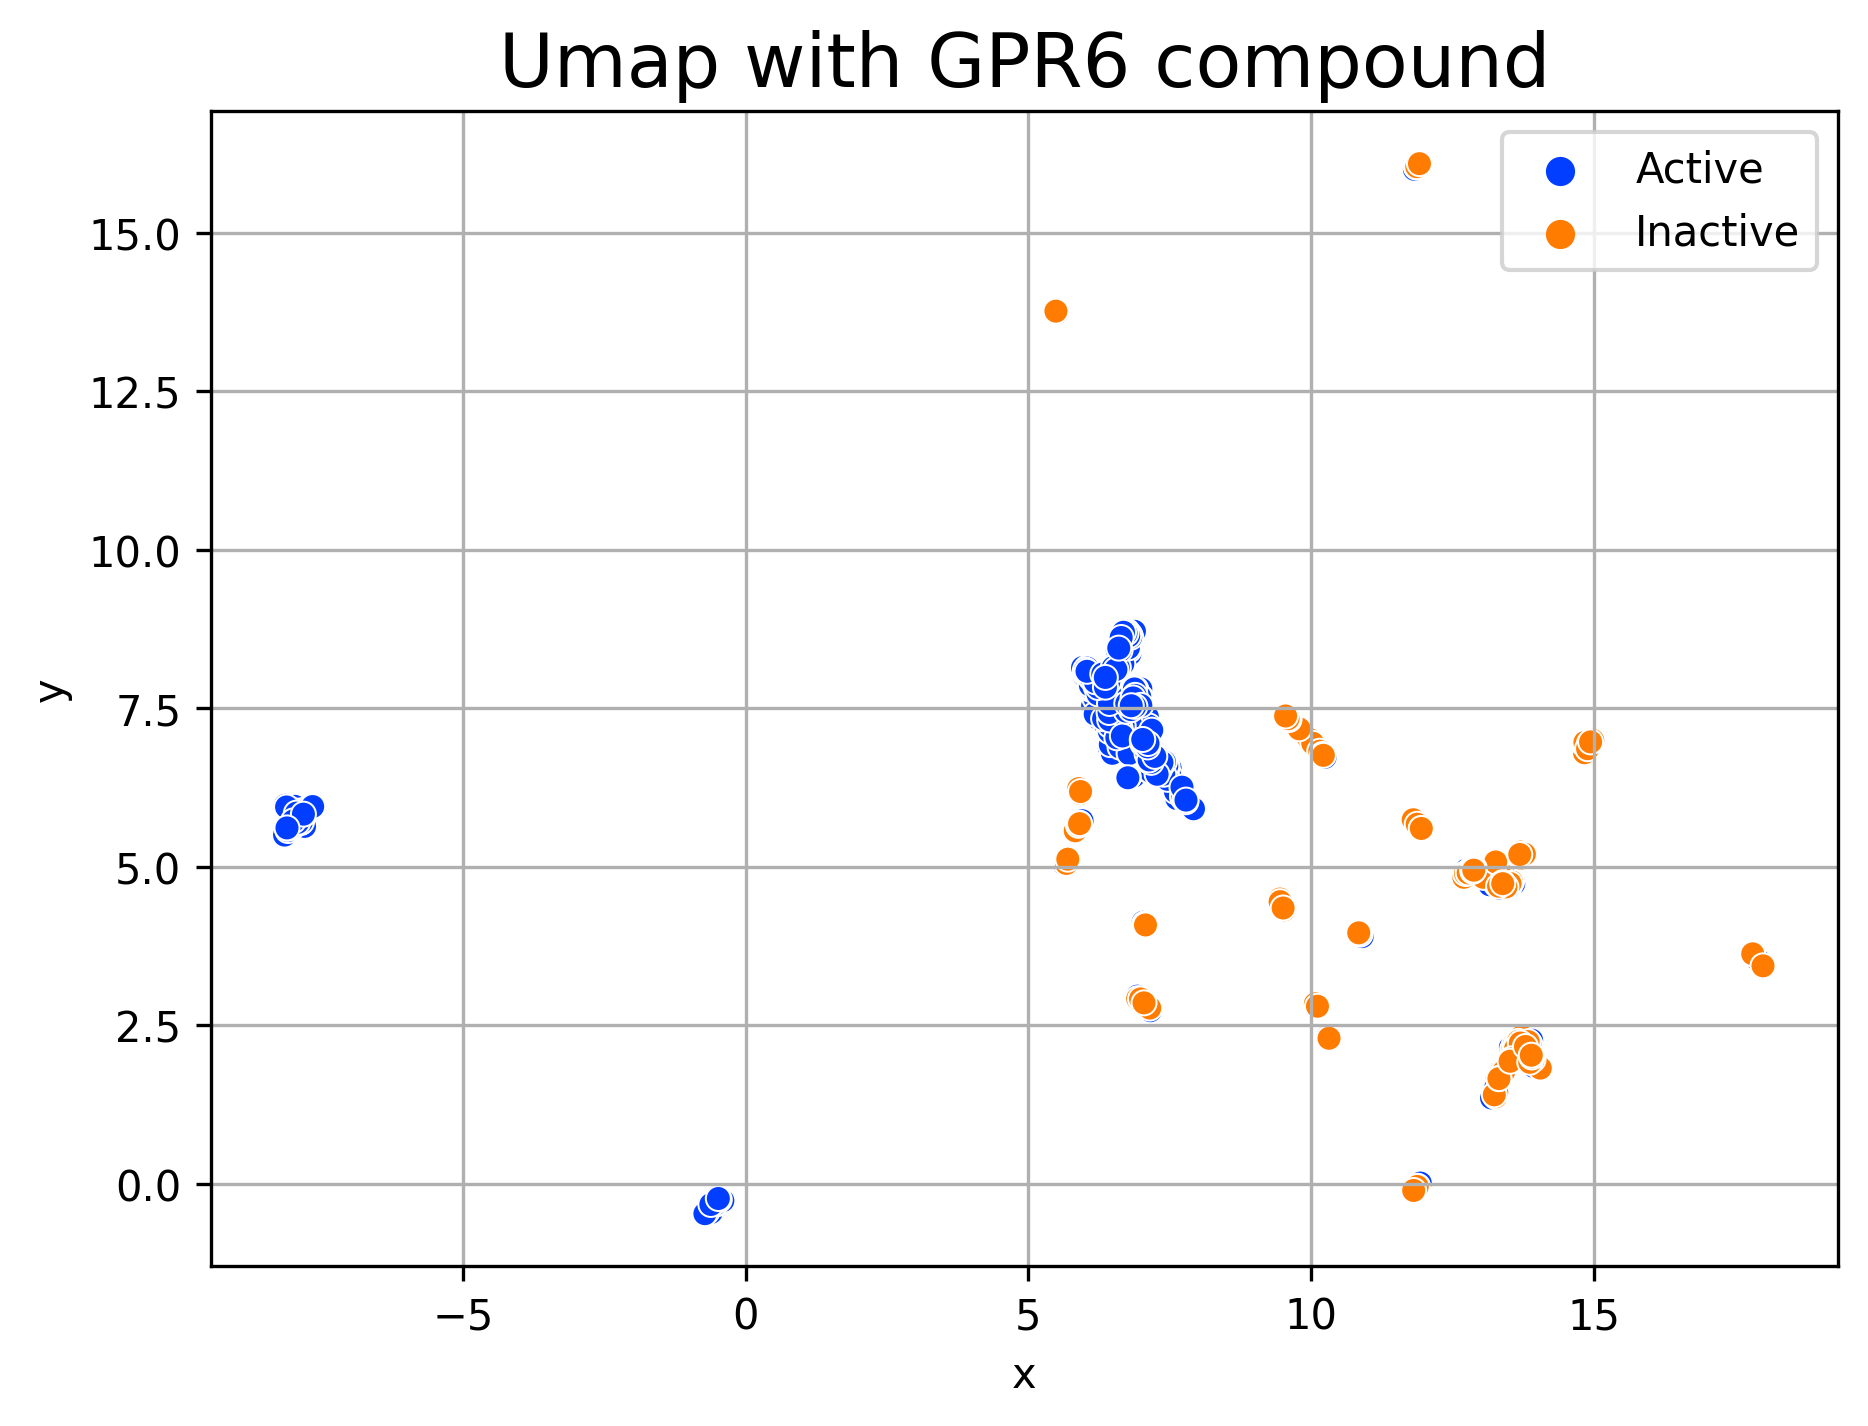

In [91]:
plt.figure(figsize = (7, 5), dpi=300)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap, palette='bright')
plt.grid()
plt.legend()
plt.title('Umap with GPR6 compound', fontsize=18)
plt.show()